

# Project: Investigating FBI Gun Checks dataset

## Table of Contents

My goal is to explore the trends of U.S gun purchases and its relationship with census variables and transformed, combined and visualized gun and census datasets using NumPy, Pandas and Matplotlib libraries.Gun data and census data are two separate datasets. Their common variables/values include state of United States and year month, which requires data cleaning at first. I used joins to merge these two datasets to see the relationship between gun purchase and census variable.

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

In this project I will be using the data provided by this [github](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md) and the original source of data is coming from [FBI National Instant Criminal Background Check System (NICS)](https://www.fbi.gov/services/cjis/nics). I guess one of the most significant caveats to this data is that state gun laws differ from each other. So some states have stricter gun laws other may not have. 

Questions I will try to under in this study are;

<ul>
<li><a>Has pandemic impacted on gun sales numbers in the US?</a></li>
<li><a>How does the gun ownership look like among ethnic groups?</a></li>


</ul>

Despite the fact that I searched for the data collection method and what each column head meaning but there was no information. So I will exclude columns like,
<ul>
<li><a>admin</a></li>
<li><a>prepawn_handgun</a></li>
<li><a>prepawn_long_gun</a></li>
<li><a>redemption_handgun</a></li>
<li><a>redemption_long_gun</a></li>
<li><a>redemption_other</a></li>
<li><a>returned_other</a></li>
<li><a>returned_handgun</a></li>
<li><a>returned_long_gun</a></li>

</ul>

not just because there is no explanation but also lack of enough data, especially in the past. Also despite no clear indication, it is safe to assume that not all the background checks ended up with sales. Census data in this project belongs to <b>2016</b> and gun check data belongs to <b>May 2021.</b> 

<a id='wrangling'></a>
## Data Wrangling



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_gun = pd.read_csv(r'C:\Users\serda\Downloads\gun_data.csv')
df_census = pd.read_csv(r'C:\Users\serda\Downloads\census_data.csv')


In [630]:
df_gun.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-05,Alabama,28248.0,317.0,21664.0,12423.0,1334.0,865,0.0,19.0,...,0.0,0.0,0.0,29.0,15.0,9.0,1.0,0.0,0.0,66937
1,2021-05,Alaska,307.0,7.0,3368.0,2701.0,323.0,208,0.0,1.0,...,0.0,0.0,0.0,12.0,14.0,0.0,0.0,0.0,0.0,7145
2,2021-05,Arizona,21767.0,695.0,20984.0,9259.0,1676.0,1010,0.0,7.0,...,5.0,0.0,0.0,11.0,10.0,1.0,0.0,1.0,0.0,56581
3,2021-05,Arkansas,7697.0,1171.0,8501.0,5072.0,422.0,340,3.0,7.0,...,0.0,0.0,0.0,8.0,8.0,2.0,0.0,0.0,0.0,24206
4,2021-05,California,20742.0,11514.0,40160.0,25824.0,5576.0,0,0.0,11.0,...,129.0,0.0,0.0,8165.0,3024.0,657.0,36.0,12.0,1.0,119739


In [631]:
df_gun.shape

(14905, 27)

In [632]:
df_gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905 entries, 0 to 14904
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14905 non-null  object 
 1   state                      14905 non-null  object 
 2   permit                     14881 non-null  float64
 3   permit_recheck             3520 non-null   float64
 4   handgun                    14885 non-null  float64
 5   long_gun                   14886 non-null  float64
 6   other                      7920 non-null   float64
 7   multiple                   14905 non-null  int64  
 8   admin                      14882 non-null  float64
 9   prepawn_handgun            12962 non-null  float64
 10  prepawn_long_gun           12960 non-null  float64
 11  prepawn_other              7535 non-null   float64
 12  redemption_handgun         12965 non-null  float64
 13  redemption_long_gun        12964 non-null  flo

In [633]:
df_gun.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

In [132]:
df_gun.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14881.000000,3.520000e+03,14885.000000,14886.000000,7920.000000,14905.000000,14882.000000,12962.000000,12960.000000,7535.000000,...,4235.000000,3410.000000,3245.000000,5170.000000,5170.000000,5170.000000,4895.000000,5170.000000,4675.000000,1.490500e+04
mean,7262.423023,9.121745e+03,7126.240578,7979.996641,550.798106,300.823348,52.695807,5.183614,7.534954,0.391506,...,3.039906,0.151320,0.162404,35.711605,24.203675,3.968085,0.960776,0.920116,0.131123,2.607925e+04
std,25979.415398,6.121086e+04,10625.250669,9223.399560,1381.419837,780.698822,561.274833,11.430987,15.845106,1.421938,...,22.583808,1.010058,1.021262,285.154774,126.755101,26.036560,4.786416,3.897209,0.525479,4.814372e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1039.000000,2176.250000,30.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.064000e+03
50%,815.000000,0.000000e+00,3529.000000,5270.000000,179.500000,135.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.342900e+04
75%,5620.000000,7.625000e+01,8654.000000,10754.750000,565.250000,333.000000,0.000000,5.000000,8.000000,0.000000,...,1.000000,0.000000,0.000000,14.000000,14.000000,1.000000,0.000000,0.000000,0.000000,2.920000e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,10623.000000,4159.000000,829.000000,70.000000,62.000000,18.000000,1.427917e+06


In [634]:
df_census.columns.values

array(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [642]:
df_census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [646]:
#dropping the fact note
df_census.drop('Fact Note',axis = 1, inplace = True)

In [647]:
df_census.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Alabama         65 non-null     object
 2   Alaska          65 non-null     object
 3   Arizona         65 non-null     object
 4   Arkansas        65 non-null     object
 5   California      65 non-null     object
 6   Colorado        65 non-null     object
 7   Connecticut     65 non-null     object
 8   Delaware        65 non-null     object
 9   Florida         65 non-null     object
 10  Georgia         65 non-null     object
 11  Hawaii          65 non-null     object
 12  Idaho           65 non-null     object
 13  Illinois        65 non-null     object
 14  Indiana         65 non-null     object
 15  Iowa            65 non-null     object
 16  Kansas          65 non-null     object
 17  Kentucky        65 non-null     object
 18  Louisiana   

In [652]:
#dropping the null values in the table
df_census.dropna(inplace = True)

In [653]:
df_census.isnull().sum()

Fact              0
Alabama           0
Alaska            0
Arizona           0
Arkansas          0
California        0
Colorado          0
Connecticut       0
Delaware          0
Florida           0
Georgia           0
Hawaii            0
Idaho             0
Illinois          0
Indiana           0
Iowa              0
Kansas            0
Kentucky          0
Louisiana         0
Maine             0
Maryland          0
Massachusetts     0
Michigan          0
Minnesota         0
Mississippi       0
Missouri          0
Montana           0
Nebraska          0
Nevada            0
New Hampshire     0
New Jersey        0
New Mexico        0
New York          0
North Carolina    0
North Dakota      0
Ohio              0
Oklahoma          0
Oregon            0
Pennsylvania      0
Rhode Island      0
South Carolina    0
South Dakota      0
Tennessee         0
Texas             0
Utah              0
Vermont           0
Virginia          0
Washington        0
West Virginia     0
Wisconsin         0


In [654]:
df_census.columns.values

array(['Fact', 'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [689]:
df_census.shape

(65, 51)

In [688]:
df_census.describe

<bound method NDFrame.describe of                                                  Fact    Alabama      Alaska  \
0        Population estimates, July 1, 2016,  (V2016)  4,863,300     741,894   
1   Population estimates base, April 1, 2010,  (V2...  4,780,131     710,249   
2   Population, percent change - April 1, 2010 (es...      1.70%       4.50%   
3                   Population, Census, April 1, 2010  4,779,736     710,231   
4   Persons under 5 years, percent, July 1, 2016, ...      6.00%       7.30%   
..                                                ...        ...         ...   
60                          Veteran-owned firms, 2012     41,943       7,953   
61                       Nonveteran-owned firms, 2012    316,984      56,091   
62                   Population per square mile, 2010       94.4         1.2   
63                    Land area in square miles, 2010  50,645.33  570,640.95   
64                                          FIPS Code       "01"        "02"   

     

In [690]:
df_gun.duplicated().sum()

0

In [691]:
duplicated = df_census[df_census.duplicated()]
duplicated

#looks like only the null valued rows deemed as duplicated.

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


### Data Cleansing - Gun Data

In [692]:
# in order to have a more granular view of the data, we need to exclude all the uncessary columns than parse the year and month
columns_to_drop =['permit', 'permit_recheck', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other']

In [693]:
df_gun.head(1)

,month,state,handgun,long_gun,other,totals,year_month,year
0,5,Alabama,21664.0,12423.0,1334.0,66937,5,2021


In [696]:
df_gun = df_gun.drop(df_gun[columns_to_drop], axis = 1, inplace=True)


KeyError: "None of [Index(['permit', 'permit_recheck', 'multiple', 'admin', 'prepawn_handgun',\n       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',\n       'redemption_long_gun', 'redemption_other', 'returned_handgun',\n       'returned_long_gun', 'returned_other', 'rentals_handgun',\n       'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun',\n       'private_sale_other', 'return_to_seller_handgun',\n       'return_to_seller_long_gun', 'return_to_seller_other'],\n      dtype='object')] are in the [columns]"

In [697]:
#splitting month and year

df_gun['year_month'] = df_gun['month']
df_gun['year']= df_gun['month'].apply(lambda x : int(x.split("-")[0]) )
df_gun['month']= df_gun['month'].apply(lambda x : int(x.split("-")[1]) )


AttributeError: 'int' object has no attribute 'split'

In [714]:
df_gun.head(5)


,month,state,handgun,long_gun,other,totals,year
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021
1,5,Alaska,3368.0,2701.0,323.0,7145,2021
2,5,Arizona,20984.0,9259.0,1676.0,56581,2021
3,5,Arkansas,8501.0,5072.0,422.0,24206,2021
4,5,California,40160.0,25824.0,5576.0,119739,2021


In [700]:
df_gun.drop('year_month',axis = 1, inplace = True)

In [702]:
df_gun.head(1)

,month,state,handgun,long_gun,other,totals,year
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021


In [703]:
df_gun.to_csv(r'C:\Users\serda\Downloads\df_gun_clean.csv', index=False)

In [704]:
df_gun_clean= pd.read_csv(r'C:\Users\serda\Downloads\df_gun_clean.csv')

In [707]:
#df_gun_clean['year_month']=pd.to_datetime(df_gun_clean['year_month'])

In [708]:
df_gun_clean.head(1)

,month,state,handgun,long_gun,other,totals,year
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021


In [709]:
df_gun_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905 entries, 0 to 14904
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   month     14905 non-null  int64  
 1   state     14905 non-null  object 
 2   handgun   14885 non-null  float64
 3   long_gun  14886 non-null  float64
 4   other     7920 non-null   float64
 5   totals    14905 non-null  int64  
 6   year      14905 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 815.2+ KB


### Data Cleansing - U.S. Census Data

In [713]:
#Settibg the index as fact then will replace it with state
df_census.set_index('Fact',inplace=True)
df_census = df_census.T.reset_index()

df_census

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""
5,Colorado,"5,540,545","5,029,324",10.20%,"5,029,196",6.10%,6.80%,22.80%,24.40%,13.40%,...,"547,352","284,554","194,508","85,849","442,365","51,722","469,524",48.5,"103,641.89","""08"""
6,Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097",5.20%,5.70%,21.10%,22.90%,16.10%,...,"326,693","187,845","106,678","56,113","259,614","31,056","281,182",738.1,"4,842.36","""09"""
7,Delaware,"952,065","897,936",6.00%,"897,934",5.80%,6.20%,21.50%,22.90%,17.50%,...,"73,418","38,328","23,964","14,440","54,782","7,206","60,318",460.8,"1,948.54","""10"""
8,Florida,"20,612,439","18,804,592",9.60%,"18,801,310",5.50%,5.70%,20.10%,21.30%,19.90%,...,"2,100,187","1,084,885","807,817","926,112","1,121,749","185,756","1,846,686",350.6,"53,624.76","""12"""
9,Georgia,"10,310,371","9,688,680",6.40%,"9,687,653",6.40%,7.10%,24.40%,25.70%,13.10%,...,"929,864","480,578","376,506","371,588","538,893","96,787","800,585",168.4,"57,513.49","""13"""


In [715]:
# Before joining to two datasets, first we need to set up the state name as index in the census_data.
df_census.rename(columns={'index':'state'},inplace = True)

In [764]:
df_census.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


In [765]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   state                                                                                   50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [857]:
#merging both datasets
df_combined = df_gun_clean.merge(df_census, left_on='state', right_on='state', how='inner')

In [858]:
df_combined.to_csv(r'C:\Users\serda\Downloads\df_combined.csv', index=False)

In [4]:
df_combined= pd.read_csv(r'C:\Users\serda\Downloads\df_combined.csv')

C:\Users\serda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (69) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df_combined.isnull().sum()

month                                  0
state                                  0
handgun                                0
long_gun                               0
other                               6350
                                    ... 
Veteran-owned firms, 2012              0
Nonveteran-owned firms, 2012           0
Population per square mile, 2010       0
Land area in square miles, 2010        0
FIPS Code                              0
Length: 72, dtype: int64

In [6]:
df_combined.columns.values

array(['month', 'state', 'handgun', 'long_gun', 'other', 'totals', 'year',
       'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Persons 65 years and over, percent, April 1, 2010',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent, April 1, 2010',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent,

In [8]:
combined_columns=['Veterans, 2011-2015', 
        'Foreign born persons, percent, 2011-2015',
        'Housing units,  July 1, 2016,  (V2016)',
        'Housing units, April 1, 2010',
        'Persons 65 years and over, percent, April 1, 2010',
        'Female persons, percent, April 1, 2010',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
       'Population, Census, April 1, 2010',
       'Owner-occupied housing unit rate, 2011-2015',
       'Median value of owner-occupied housing units, 2011-2015',
       'Median selected monthly owner costs -with a mortgage, 2011-2015',
       'Median selected monthly owner costs -without a mortgage, 2011-2015',
       'Median gross rent, 2011-2015', 
        'Building permits, 2016',
       'Households, 2011-2015',
        'Persons per household, 2011-2015',
       'Living in same house 1 year ago, percent of persons age 1 year+, 2011-2015',
       'Language other than English spoken at home, percent of persons age 5 years+, 2011-2015',
       'Persons  without health insurance, under age 65 years, percent',
       'In civilian labor force, total, percent of population age 16 years+, 2011-2015',
       'In civilian labor force, female, percent of population age 16 years+, 2011-2015',
       'Total accommodation and food services sales, 2012 ($1,000)',
       'Total health care and social assistance receipts/revenue, 2012 ($1,000)',
       'Total manufacturers shipments, 2012 ($1,000)',
       'Total merchant wholesaler sales, 2012 ($1,000)',
       'Total retail sales, 2012 ($1,000)',
       'Total retail sales per capita, 2012',
       'Mean travel time to work (minutes), workers age 16 years+, 2011-2015',
       'Per capita income in past 12 months (in 2015 dollars), 2011-2015',
       'Persons in poverty, percent',
       'Total employer establishments, 2015', 'Total employment, 2015',
       'Total annual payroll, 2015 ($1,000)',
       'Total employment, percent change, 2014-2015',
       'Total nonemployer establishments, 2015', 'All firms, 2012',
       'Men-owned firms, 2012', 'Women-owned firms, 2012',
       'Minority-owned firms, 2012', 'Nonminority-owned firms, 2012',
       'Veteran-owned firms, 2012', 'Nonveteran-owned firms, 2012',
       'Population per square mile, 2010',
       'Land area in square miles, 2010',  
        'FIPS Code' ]

In [9]:
df_combined.drop(combined_columns, axis = 1, inplace=True)

In [10]:
df_combined.head()

,month,state,handgun,long_gun,other,totals,year,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)",...,"American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Median household income (in 2015 dollars), 2011-2015"
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021,"4,863,300","4,780,131",6.00%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
1,4,Alabama,28723.0,16905.0,1962.0,88232,2021,"4,863,300","4,780,131",6.00%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
2,3,Alabama,34675.0,20702.0,2048.0,107474,2021,"4,863,300","4,780,131",6.00%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
3,2,Alabama,20970.0,16026.0,1548.0,74710,2021,"4,863,300","4,780,131",6.00%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
4,1,Alabama,33563.0,23477.0,2309.0,105602,2021,"4,863,300","4,780,131",6.00%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"


In [11]:
df_combined.columns.values

array(['month', 'state', 'handgun', 'long_gun', 'other', 'totals', 'year',
       'Population estimates, July 1, 2016,  (V2016)',
       'Population estimates base, April 1, 2010,  (V2016)',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, April 1, 2010',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispani

In [12]:
last_two=['Persons under 5 years, percent, April 1, 2010', 'Population estimates base, April 1, 2010,  (V2016)']

In [13]:
df_combined.drop(last_two, axis = 1, inplace=True)

In [14]:
df_combined.columns.values


array(['month', 'state', 'handgun', 'long_gun', 'other', 'totals', 'year',
       'Population estimates, July 1, 2016,  (V2016)',
       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, July 1, 2016,  (V2016)',
       'Persons under 18 years, percent, April 1, 2010',
       'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
       'Female persons, percent,  July 1, 2016,  (V2016)',
       'White alone, percent, July 1, 2016,  (V2016)',
       'Black or African American alone, percent, July 1, 2016,  (V2016)',
       'American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)',
       'Asian alone, percent, July 1, 2016,  (V2016)',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino, percent, July 1, 2016,  (V2016)',
       'White alone, not Hispanic or Latino, percent, July 1, 2016,  (

In [15]:
df_combined.drop('Persons under 18 years, percent, April 1, 2010', axis = 1, inplace=True)

In [16]:
df_combined

,month,state,handgun,long_gun,other,totals,year,"Population estimates, July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)",...,"American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Median household income (in 2015 dollars), 2011-2015"
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021,"4,863,300",6.00%,22.60%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
1,4,Alabama,28723.0,16905.0,1962.0,88232,2021,"4,863,300",6.00%,22.60%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
2,3,Alabama,34675.0,20702.0,2048.0,107474,2021,"4,863,300",6.00%,22.60%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
3,2,Alabama,20970.0,16026.0,1548.0,74710,2021,"4,863,300",6.00%,22.60%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
4,1,Alabama,33563.0,23477.0,2309.0,105602,2021,"4,863,300",6.00%,22.60%,...,0.70%,1.40%,0.10%,1.60%,4.20%,65.80%,84.30%,23.50%,11.80%,"$43,623"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13545,3,Wyoming,986.0,1574.0,NaN,2776,1999,"585,501",6.50%,23.70%,...,2.70%,1.00%,0.10%,2.10%,10.00%,84.10%,92.30%,25.70%,8.50%,"$58,840"
13546,2,Wyoming,831.0,1584.0,NaN,2643,1999,"585,501",6.50%,23.70%,...,2.70%,1.00%,0.10%,2.10%,10.00%,84.10%,92.30%,25.70%,8.50%,"$58,840"
13547,1,Wyoming,668.0,1401.0,NaN,2180,1999,"585,501",6.50%,23.70%,...,2.70%,1.00%,0.10%,2.10%,10.00%,84.10%,92.30%,25.70%,8.50%,"$58,840"
13548,12,Wyoming,925.0,2303.0,NaN,3379,1998,"585,501",6.50%,23.70%,...,2.70%,1.00%,0.10%,2.10%,10.00%,84.10%,92.30%,25.70%,8.50%,"$58,840"


In [17]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 24 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   month                                                                              13550 non-null  int64  
 1   state                                                                              13550 non-null  object 
 2   handgun                                                                            13550 non-null  float64
 3   long_gun                                                                           13550 non-null  float64
 4   other                                                                              7200 non-null   float64
 5   totals                                                                             13550 non-null  int

In [18]:
new_labels = list(df_combined.columns)
new_labels[7] ='Population estimates, 2016'
df_combined.columns = new_labels

In [19]:
new_labels = list(df_combined.columns)
new_labels[8] ='Persons under 5 years percent, 2016'
df_combined.columns = new_labels

In [20]:
new_labels = list(df_combined.columns)
new_labels[9] ='Persons under 18 years percent, 2016'
df_combined.columns = new_labels

In [21]:
new_labels = list(df_combined.columns)
new_labels[10] ='Persons 65 years and over percent, 2016'
df_combined.columns = new_labels

In [22]:
new_labels = list(df_combined.columns)
new_labels[11] ='Female persons percent, 2016'
df_combined.columns = new_labels

In [23]:
new_labels = list(df_combined.columns)
new_labels[12] ='White alone percent, 2016'
df_combined.columns = new_labels

In [24]:
new_labels = list(df_combined.columns)
new_labels[13] ='Black or African American alone percent, 2016'
df_combined.columns = new_labels

In [25]:
new_labels = list(df_combined.columns)
new_labels[14] ='American Indian and Alaska Native alone percent, 2016'
df_combined.columns = new_labels

In [26]:
new_labels = list(df_combined.columns)
new_labels[15] ='Asian alone percent, 2016'
df_combined.columns = new_labels

In [27]:
new_labels = list(df_combined.columns)
new_labels[18] ='Hispanic or Latino percent, 2016'
df_combined.columns = new_labels

In [28]:
new_labels = list(df_combined.columns)
new_labels[19] ='White alone, not Hispanic or Latino percent, 2016'
df_combined.columns = new_labels

In [29]:
new_labels = list(df_combined.columns)
new_labels[20] ='High school graduate or higher, percent of persons age 25 years+'
df_combined.columns = new_labels

In [30]:
new_labels = list(df_combined.columns)
new_labels[21] ="Bachelor's degree or higher, percent of persons age 25 years+"
df_combined.columns = new_labels

In [31]:
new_labels = list(df_combined.columns)
new_labels[23] ="Median household income, 2011-2015"
df_combined.columns = new_labels

In [55]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 24 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   month                                                                              13550 non-null  int64  
 1   state                                                                              13550 non-null  object 
 2   handgun                                                                            13550 non-null  float64
 3   long_gun                                                                           13550 non-null  float64
 4   other                                                                              7200 non-null   float64
 5   totals                                                                             13550 non-null  int

In [33]:
df_combined['Two or More Races, percent, July 1, 2016,  (V2016)'] = df_combined['Two or More Races, percent, July 1, 2016,  (V2016)'].replace('%','',regex=True).astype('float')

In [56]:
df_combined['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'] = df_combined['Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)'].replace('%','',regex=True).astype('float')

ValueError: could not convert string to float: 'Z'

In [72]:

df_combined.columns['Median household income, 2011-2015'] = df_combined.columns['Median household income, 2011-2015'].replace('[\$\,\.]',' ',regex=True).astype('float')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [90]:
df_combined.columns['Median household income, 2011-2015'] = pd.to_numeric(df_combined.columns['Median household income, 2011-2015'], downcast="float")

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [91]:
df_combined['Median household income, 2011-2015'] = pd.concat([df_combined['Median household income, 2011-2015'].str.split()
                       .str[0]
                       .str.replace('$','').astype(float) for col in df_combined], axis=1)

<ipython-input-91-4cc4757a3e3a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_combined['Median household income, 2011-2015'] = pd.concat([df_combined['Median household income, 2011-2015'].str.split()


In [92]:
df_combined['Median household income, 2011-2015'] = df_combined['Median household income, 2011-2015'].astype('float')

In [35]:
df_combined['Hispanic or Latino percent, 2016'] = df_combined['Hispanic or Latino percent, 2016'].replace('%','',regex=True).astype('float')

In [52]:
df_combined['Persons under 18 years percent, 2016'] = df_combined['Persons under 18 years percent, 2016'].replace('%','',regex=True).astype('float')

In [87]:
df_combined['Median household income, 2011-2015'] = df_combined['Median household income, 2011-2015'].replace('$','',regex=True)

In [36]:
df_combined['Persons under 5 years percent, 2016'] = df_combined['Persons under 5 years percent, 2016'].replace('%','',regex=True).astype('float')

In [37]:
df_combined['White alone, not Hispanic or Latino percent, 2016']= df_combined['White alone, not Hispanic or Latino percent, 2016'].replace('%','',regex=True).astype('float')

In [58]:
combined =  df_combined.columns
for c in combined[20:24]:
     df_combined[c] =  df_combined[c].replace('%',' ',regex=True).astype('float')

ValueError: could not convert string to float: '$43,623 '

In [113]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13550 entries, 0 to 13549
Data columns (total 24 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   month                                                                              13550 non-null  int64  
 1   state                                                                              13550 non-null  object 
 2   handgun                                                                            13550 non-null  float64
 3   long_gun                                                                           13550 non-null  float64
 4   other                                                                              7200 non-null   float64
 5   totals                                                                             13550 non-null  int

In [111]:
df_combined['High school graduate or higher, percent of persons age 25 years+'].values

array([84.3, 84.3, 84.3, ..., 92.3, 92.3, 92.3])

In [112]:
df_combined.head(5)

,month,state,handgun,long_gun,other,totals,year,"Population estimates, 2016","Persons under 5 years percent, 2016","Persons under 18 years percent, 2016",...,"American Indian and Alaska Native alone percent, 2016","Asian alone percent, 2016","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino percent, 2016","White alone, not Hispanic or Latino percent, 2016","High school graduate or higher, percent of persons age 25 years+","Bachelor's degree or higher, percent of persons age 25 years+","With a disability, under age 65 years, percent, 2011-2015","Median household income, 2011-2015"
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021,4863300.0,0.0006,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
1,4,Alabama,28723.0,16905.0,1962.0,88232,2021,4863300.0,0.0006,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
2,3,Alabama,34675.0,20702.0,2048.0,107474,2021,4863300.0,0.0006,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
3,2,Alabama,20970.0,16026.0,1548.0,74710,2021,4863300.0,0.0006,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
4,1,Alabama,33563.0,23477.0,2309.0,105602,2021,4863300.0,0.0006,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0


<a id='eda'></a>
# Exploratory Data Analysis


### Has pandemic impacted on gun sales numbers in the US?

In [104]:
df_combined.values


array([[5, 'Alabama', 21664.0, ..., 23.5, 11.8, 43623.0],
       [4, 'Alabama', 28723.0, ..., 23.5, 11.8, 43623.0],
       [3, 'Alabama', 34675.0, ..., 23.5, 11.8, 43623.0],
       ...,
       [1, 'Wyoming', 668.0, ..., 25.7, 8.5, 58840.0],
       [12, 'Wyoming', 925.0, ..., 25.7, 8.5, 58840.0],
       [11, 'Wyoming', 45.0, ..., 25.7, 8.5, 58840.0]], dtype=object)

In [106]:
for column in df_combined.columns:
    if 'percent' in column:
        df_combined[column] = df_combined[column]/100

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [107]:
df_combined.describe()

,month,handgun,long_gun,other,totals,year,"Population estimates, 2016","Persons under 5 years percent, 2016","Persons under 18 years percent, 2016","Persons 65 years and over percent, 2016",...,"Black or African American alone percent, 2016","American Indian and Alaska Native alone percent, 2016","Asian alone percent, 2016","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino percent, 2016","White alone, not Hispanic or Latino percent, 2016","High school graduate or higher, percent of persons age 25 years+","Bachelor's degree or higher, percent of persons age 25 years+","With a disability, under age 65 years, percent, 2011-2015","Median household income, 2011-2015"
count,13550.000000,13550.000000,13550.000000,7200.000000,1.355000e+04,13550.000000,1.355000e+04,13550.000000,13550.000000,13550.000000,...,13550.000000,1.355000e+04,13550.000000,13550.000000,13550.000000,13550.000000,13550.000000,13550.000000,13550.000000,13550.000000
mean,6.472325,7806.918672,8763.035498,604.872778,2.865784e+04,2009.627306,6.448927e+06,0.000470,0.001743,0.001181,...,0.000836,1.180260e-04,0.000363,2.310400,8.874680,52.779080,67.424100,22.363160,6.812720,54311.860000
std,3.472498,10900.797772,9307.350777,1437.689973,4.976376e+04,6.527888,7.198950e+06,0.000267,0.000984,0.000678,...,0.000982,2.339407e-04,0.000573,3.355218,9.707527,32.543568,37.503568,13.249673,4.130339,8859.908756
min,1.000000,0.000000,0.000000,0.000000,6.000000e+00,1998.000000,5.855010e+05,0.000005,0.000020,0.000014,...,0.000002,3.000000e-07,0.000001,0.018000,0.036000,0.381000,0.842000,0.241000,0.068000,39665.000000
25%,3.000000,1515.250000,2864.250000,62.000000,7.031750e+03,2004.000000,1.831102e+06,0.000480,0.001900,0.001040,...,0.000060,2.000000e-05,0.000080,1.200000,1.500000,22.100000,81.800000,19.200000,6.500000,47507.000000
50%,6.000000,4128.500000,6042.500000,218.500000,1.541350e+04,2010.000000,4.559320e+06,0.000600,0.002225,0.001500,...,0.000470,6.000000e-05,0.000235,2.000000,6.250000,62.050000,87.850000,27.200000,8.000000,52601.000000
75%,10.000000,9437.000000,11387.750000,644.000000,3.175975e+04,2015.000000,7.288000e+06,0.000640,0.002350,0.001610,...,0.001260,1.200000e-04,0.000470,2.500000,11.600000,79.600000,90.700000,31.100000,9.000000,60629.000000
max,12.000000,147714.000000,108058.000000,77929.000000,1.427917e+06,2021.000000,3.925002e+07,0.000830,0.003020,0.001990,...,0.003770,1.520000e-03,0.003770,23.700000,39.100000,93.500000,92.800000,40.500000,14.400000,74551.000000


In [167]:
df_combined['year'] >= 2020
exclude = df_combined[df_combined['year'] >= 2020]
exclude

,month,state,handgun,long_gun,other,totals,year,"Population estimates, 2016","Persons under 5 years percent, 2016","Persons under 18 years percent, 2016",...,"American Indian and Alaska Native alone percent, 2016","Asian alone percent, 2016","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino percent, 2016","White alone, not Hispanic or Latino percent, 2016","High school graduate or higher, percent of persons age 25 years+","Bachelor's degree or higher, percent of persons age 25 years+","With a disability, under age 65 years, percent, 2011-2015","Median household income, 2011-2015"
0,5,Alabama,21664.0,12423.0,1334.0,66937,2021,4863300.0,0.00060,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
1,4,Alabama,28723.0,16905.0,1962.0,88232,2021,4863300.0,0.00060,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
2,3,Alabama,34675.0,20702.0,2048.0,107474,2021,4863300.0,0.00060,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
3,2,Alabama,20970.0,16026.0,1548.0,74710,2021,4863300.0,0.00060,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
4,1,Alabama,33563.0,23477.0,2309.0,105602,2021,4863300.0,0.00060,0.00226,...,0.00007,0.00014,0.10%,1.6,4.2,65.8,84.3,23.5,11.8,43623.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13291,5,Wyoming,2902.0,2591.0,255.0,6272,2020,585501.0,0.00065,0.00237,...,0.00027,0.00010,0.10%,2.1,10.0,84.1,92.3,25.7,8.5,58840.0
13292,4,Wyoming,3988.0,3102.0,327.0,8566,2020,585501.0,0.00065,0.00237,...,0.00027,0.00010,0.10%,2.1,10.0,84.1,92.3,25.7,8.5,58840.0
13293,3,Wyoming,4155.0,3349.0,299.0,8847,2020,585501.0,0.00065,0.00237,...,0.00027,0.00010,0.10%,2.1,10.0,84.1,92.3,25.7,8.5,58840.0
13294,2,Wyoming,2322.0,1975.0,170.0,5500,2020,585501.0,0.00065,0.00237,...,0.00027,0.00010,0.10%,2.1,10.0,84.1,92.3,25.7,8.5,58840.0


In [194]:
df_combined.columns.values

array(['month', 'state', 'handgun', 'long_gun', 'other', 'totals', 'year',
       'Population estimates, 2016',
       'Persons under 5 years percent, 2016',
       'Persons under 18 years percent, 2016',
       'Persons 65 years and over percent, 2016',
       'Female persons percent, 2016', 'White alone percent, 2016',
       'Black or African American alone percent, 2016',
       'American Indian and Alaska Native alone percent, 2016',
       'Asian alone percent, 2016',
       'Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)',
       'Two or More Races, percent, July 1, 2016,  (V2016)',
       'Hispanic or Latino percent, 2016',
       'White alone, not Hispanic or Latino percent, 2016',
       'High school graduate or higher, percent of persons age 25 years+',
       "Bachelor's degree or higher, percent of persons age 25 years+",
       'With a disability, under age 65 years, percent, 2011-2015',
       'Median household income, 2011-2015'], dtyp

In [231]:
df_combined['High school graduate or higher, percent of persons age 25 years+'].values

array([84.3, 84.3, 84.3, ..., 92.3, 92.3, 92.3])

In [221]:
total_gun = exclude.groupby(exclude['month'])['totals'].sum().reset_index()

In [222]:
total_gun

,month,totals
0,1,6931584
1,2,6162839
2,3,8346070
3,4,6353930
4,5,6262435
5,6,3904514
6,7,3609720
7,8,3080200
8,9,2852881
9,10,3262203


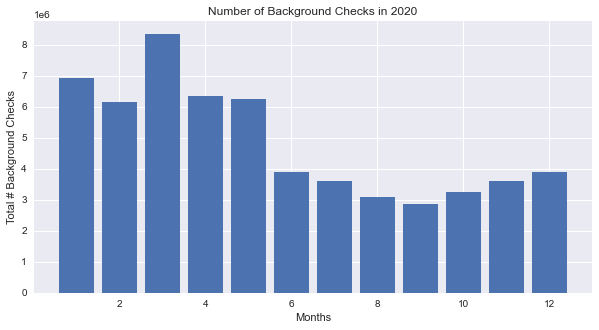

In [223]:
plt.subplots(figsize = (10,5))
plt.bar(total_gun['month'],total_gun['totals'])
plt.title('Number of Background Checks in 2020')
plt.xlabel('Months')
plt.ylabel('Total # Background Checks');

### Based on the 2016 Population Estimates, how does the background check went since the pandemic began in March 2020 in top 4 states?

In [115]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

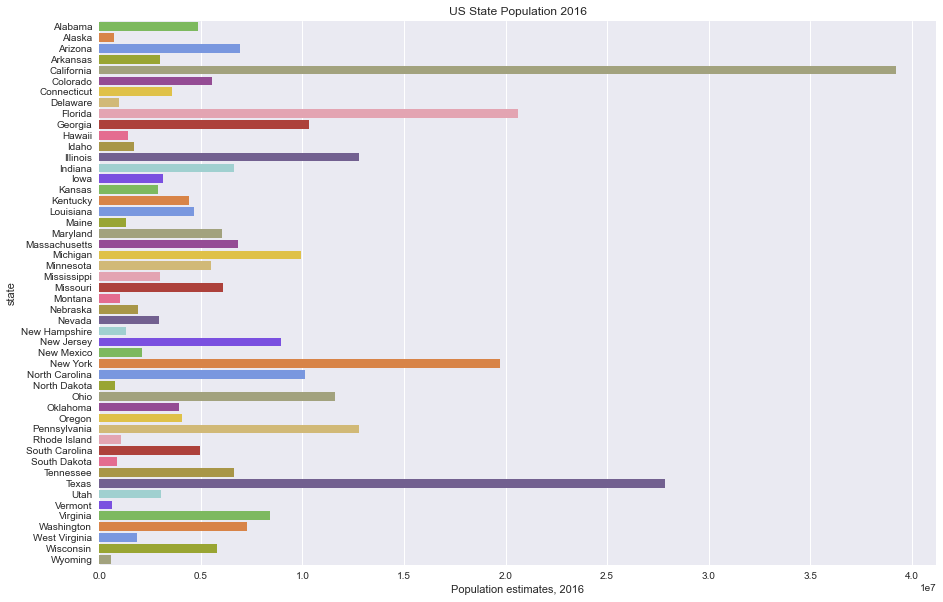

In [179]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
# sns.barplot(x = "names", y = "values", ax=ax, data=df)

sns.barplot(y='state',x='Population estimates, 2016', 
            data=exclude, ax=ax, palette=pkmn_type_colors).set_title('US State Population 2016');
 


In [226]:
df_total = exclude.groupby(['state','year','month'])['handgun','long_gun','totals'].sum()
df_total

<ipython-input-226-b714cc667105>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_total = exclude.groupby(['state','year','month'])['handgun','long_gun','totals'].sum()


handgun  long_gun  totals
state   year month                           
Alabama 2020 1      22478.0   12598.0   79332
             2      24590.0   12531.0   75336
             3      34897.0   17850.0   92652
             4      28951.0   12512.0   70748
             5      32394.0   13899.0   80519
...                     ...       ...     ...
Wyoming 2021 1       4039.0    3697.0    9266
             2       2724.0    2320.0    6382
             3       4004.0    3635.0    9348
             4       3443.0    3105.0    7861
             5       2587.0    2200.0    6381

[850 rows x 3 columns]

In [215]:
#sorting in ascending feature
bigger_to_smaller = df_total['totals']
bigger_to_smaller

state    year  month
Alabama  2020  1        79332
               2        75336
               3        92652
               4        70748
               5        80519
                        ...  
Wyoming  2021  1         9266
               2         6382
               3         9348
               4         7861
               5         6381
Name: totals, Length: 850, dtype: int64

<ipython-input-210-35260a74ea81>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)


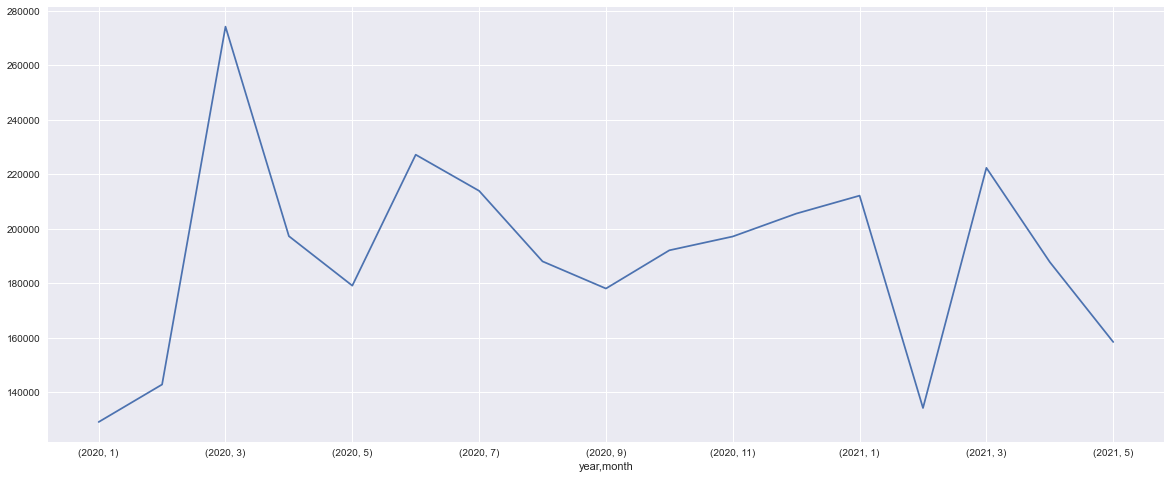

In [210]:
tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)
plt.style.use('seaborn')
ax = bigger_to_smaller['Texas'].plot(figsize=(20,8))

<ipython-input-190-105a02d93436>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)


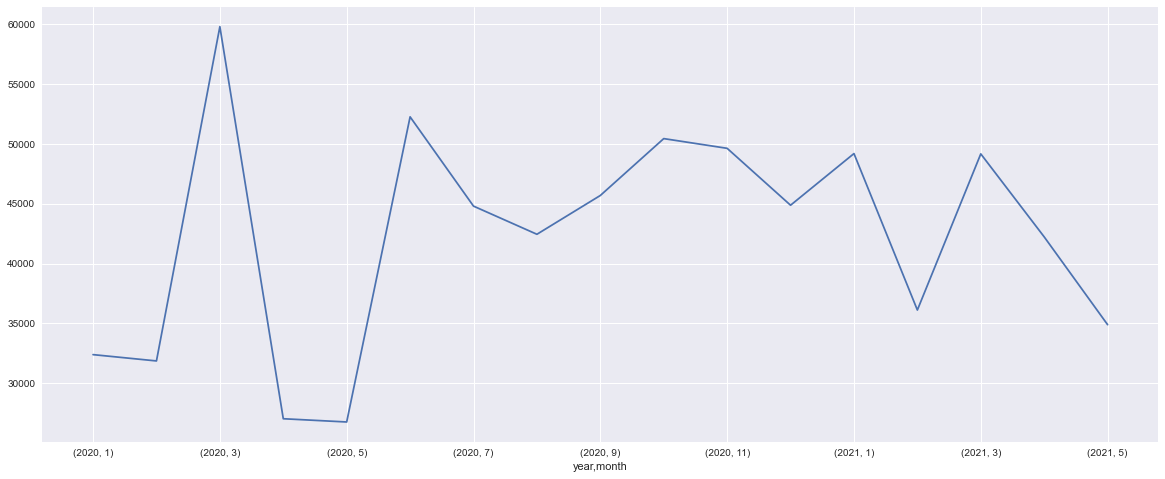

In [190]:
tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)
plt.style.use('seaborn')
ax = bigger_to_smaller['New York'].plot(figsize=(20,8))




<ipython-input-191-35260a74ea81>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)


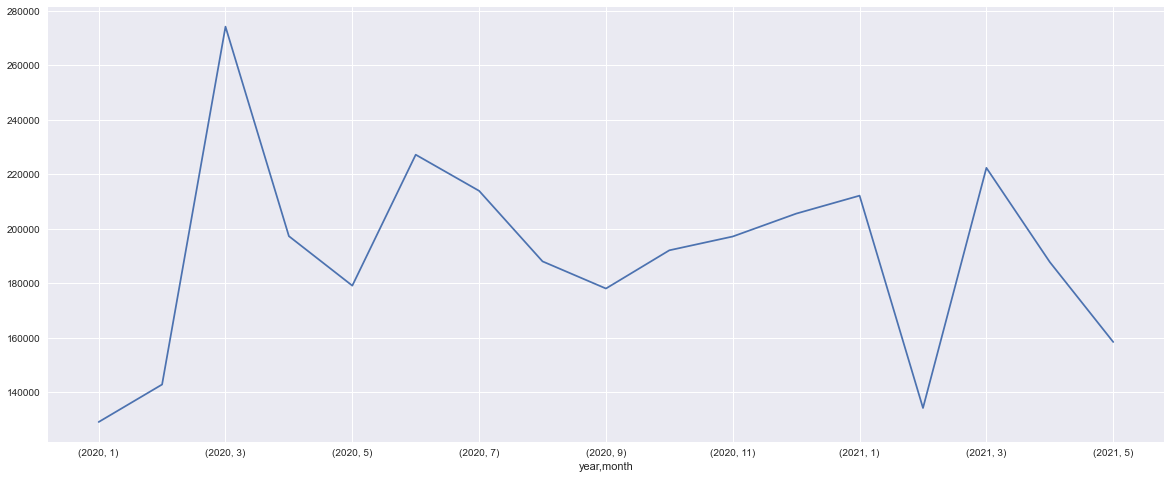

In [191]:
tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)
plt.style.use('seaborn')
ax = bigger_to_smaller['Texas'].plot(figsize=(20,8))

<ipython-input-216-56afe97ad7f9>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)


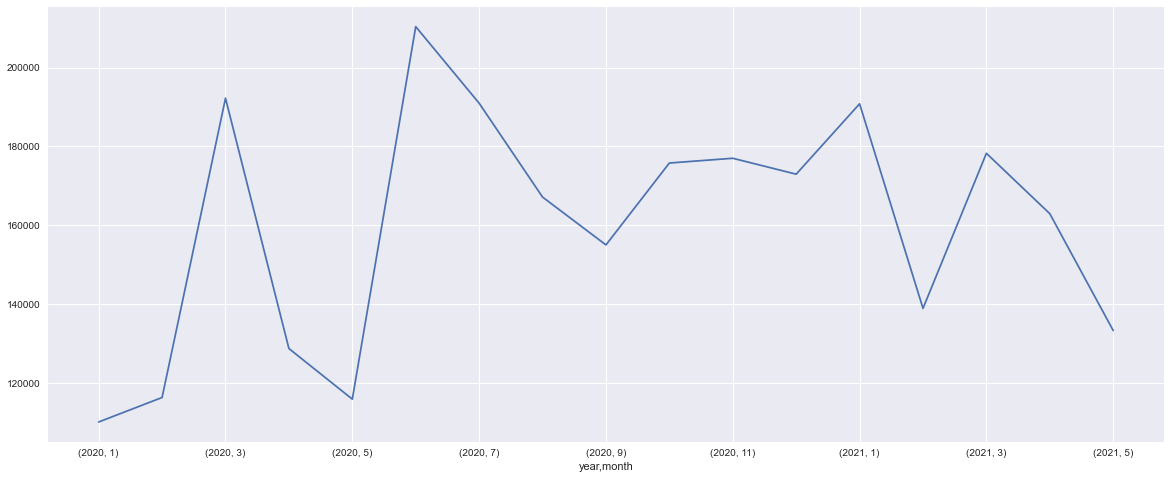

In [216]:
tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)
plt.style.use('seaborn')
ax = bigger_to_smaller['Florida'].plot(figsize=(20,8))

<ipython-input-192-d6b7a95769d1>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)


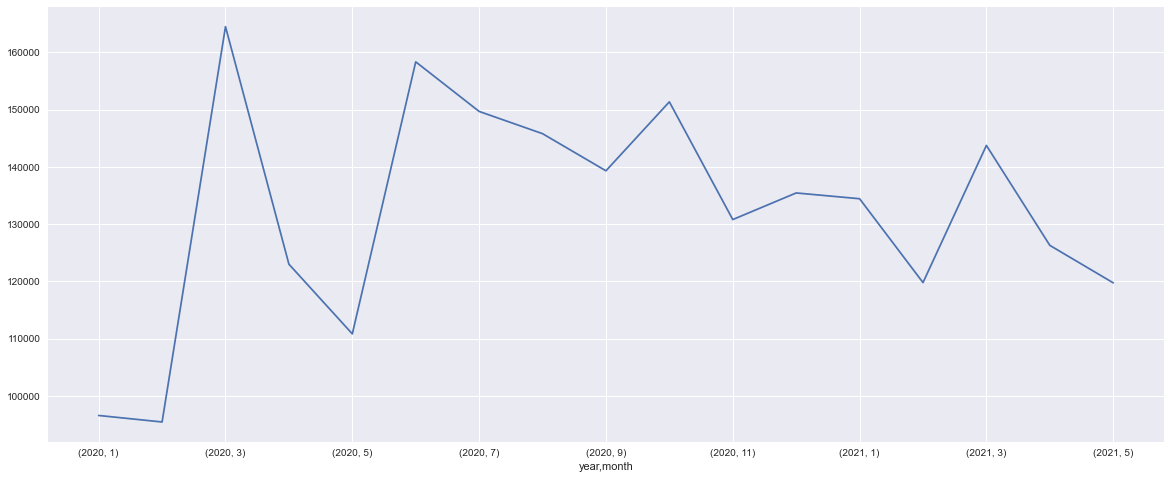

In [192]:
tick_placement = pd.np.arange(2, len(bigger_to_smaller), 12)
plt.style.use('seaborn')
ax = bigger_to_smaller['California'].plot(figsize=(20,8))

### Conclusion:

All top four states in terms of population give us the same trend. Despite the fact that having your background checked does not necessarily mean that you purchase a gun but there is a higher chances such checks may have ended up with a purchase. We consider the pandemic bega data as March 2020 where there is a clear spike in the trendlines for all the states above, but for the two states; **Florida** and **California**, that spike surpussed the in the following months for Florida and as much as the March numbers for California and remained high rest of the year for both states.